# 5-3 KNN Regression 

Example : use KNN method to build to predictive model to predict "mdev" using all predictors in the dataset.

In [2]:
library(MASS)
library(tidyverse)
library(caret)

In [3]:
data(Boston)
str(Boston)
set.seed(252)

index = createDataPartition(Boston$medv, p = 0.8, list = FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


[1] 4.603896

[1] 6.326003

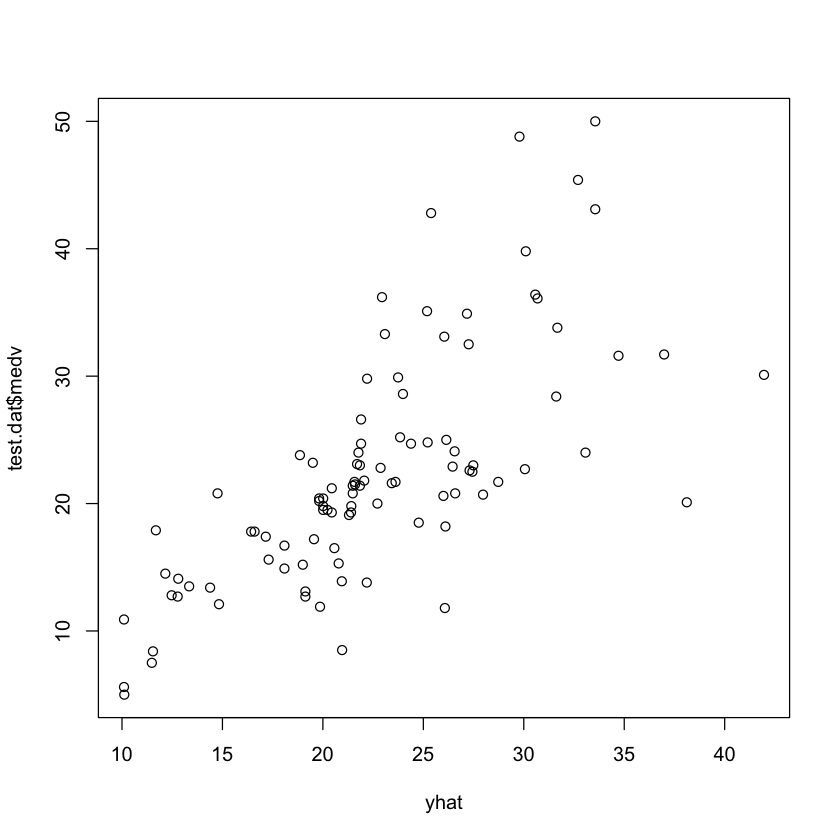

In [4]:
# the predictor variable --> matrix
X  =train.dat[,-14]

#medv of the train data
y=train.dat[,14]

#KNN regression with k=7
knn.fit1 = knnreg(X, y, k = 7)
#knn.fit2 = knnreg(medv~., data=train.dat, k =7)  # same as above

#make prediction of the model on the test data
yhat = predict(knn.fit1, test.dat[,-14])
plot(yhat, test.dat$medv)

caret::MAE(yhat, test.dat$medv)
#RMSE
caret::RMSE(yhat, test.dat$medv) # NOT good at all



In [7]:
# model training using the caret package : train function 

set.seed(295)

#cross validation 
cv.control = trainControl(method = "cv", number = 10)

#create a tuning grid
#hyper parameter : k

hyper_grid = expand.grid(
    k = 1:10
)

#train to find the optimal tuning parameters

knn.fits= train(medv~., data=train.dat, method = "knn", 
trControl = cv.control,
trace = FALSE,
tuneGrid = hyper_grid
#PreProc = c("center","scale")
#maxit = 500
)

#the best tuning parameter 
knn.fits$bestTune


,k
,<int>
3,3


In [ ]:
# KNN regression with k=3
knn.fit1 = knnreg(X, y, k = 3)
#knn.fit2 = knnreg(medv~., data=train.dat, k =7)  # same as above